# Optimización de gastos de marketing para Showz

En este análisis de datos se ofrecerán posibles soluciones para la optimización de gastos en el departamento de marketing para al empresa de venta de entradas de eventos "Showz"

## Inicialización

Se cargan las librerías

In [252]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

Se cargan los datos

In [253]:
visits = pd.read_csv('visits_log_us.csv')
orders = pd.read_csv('orders_log_us.csv')
costs = pd.read_csv('costs_us.csv')

## Preparación de datos

Se hace el preprocesamiento de datos y un análisis exploratorio para facilitar una comprensión inicial de los datos

In [254]:
print(visits.head(10))
print()
visits.info()

    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   
5  desktop  2017-09-03 21:36:00          5  2017-09-03 21:35:00   
6  desktop  2018-01-30 12:09:00          1  2018-01-30 11:13:00   
7    touch  2017-11-05 15:15:00          3  2017-11-05 15:14:00   
8  desktop  2017-07-19 10:44:00          3  2017-07-19 10:41:00   
9  desktop  2017-11-08 13:43:00          5  2017-11-08 13:42:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  
5  16007536194108375387  
6   6661610529277171451  
7  11423865690854540312  
8   2987360259350925644  
9 

In [255]:
print(orders.head(10))
print()
orders.info()

                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450
5  2017-06-01 08:43:00     0.18  10402394430196413321
6  2017-06-01 08:54:00     1.83  12464626743129688638
7  2017-06-01 09:22:00     1.22   3644482766749211722
8  2017-06-01 09:22:00     3.30  17542070709969841479
9  2017-06-01 09:23:00     0.37   1074355127080856382

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [256]:
print(costs.head(10))
print()
costs.info()

   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08
5          1  2017-06-06  40.39
6          1  2017-06-07  40.59
7          1  2017-06-08  56.63
8          1  2017-06-09  40.16
9          1  2017-06-10  43.24

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


###  Renombrar columnas

Tanto en el dataframe 'visits' como 'orders' se tiene que renombrar las columnas pasándolas a formato snake case.

In [257]:
# Se renombran columnas en 'visits'

new_columns = []

for old_name in visits.columns:
    new_names = old_name.lower().strip().replace(' ','_')
    new_columns.append(new_names)

visits.columns = new_columns

print(visits.columns)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')


In [258]:
# Se renombran columnas en 'orders'

new_columns = []

for old_name in orders.columns:
    new_names = old_name.lower().strip().replace(' ','_')
    new_columns.append(new_names)

orders.columns = new_columns

print(orders.columns)

Index(['buy_ts', 'revenue', 'uid'], dtype='object')


### Manejo de datos ausentes y duplicados

No se detectan datos ausentes en nuestros dataframes, por lo que procederemos a revisar si existen datos duplicados.

#### Manejo de duplicados

Se revisa si existen datos duplicados

In [259]:
print('Número de líneas duplicaddas en el dataframe visits: ', visits.duplicated().sum())
print('Número de líneas duplicaddas en el dataframe orders: ', orders.duplicated().sum())
print('Número de líneas duplicaddas en el dataframe costs: ', costs.duplicated().sum())

Número de líneas duplicaddas en el dataframe visits:  0
Número de líneas duplicaddas en el dataframe orders:  0
Número de líneas duplicaddas en el dataframe costs:  0


Tampoco se detectan datos duplicados, procedemos a la corrección de datos.

### Corrección de datos

#### Conversión de datos

Procedemos con la conversión de las columnas de todos los dataframes que contengan fechas al tipo de datos 'datetime64'.

In [260]:
visits['end_ts'] = pd.to_datetime(pd.to_datetime(visits['end_ts']))
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

visits.info()
print()
orders.info()
print()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to

### Enriquecimiento de datos

Se procede a agregar información necesaria a los dataframes para su posterior análisis.

#### Visits

Se agregarán columnas que contengan el mes de cada visita así como el mes de la primera visita de cada usuario. También se crearán columnas con el número de año, mes, semana y día de cada visita. Además también se creará una columna donde diga la duración de la visita.

In [261]:
# Se crea una columna con la fecha de la primera visita de cada usuario

first_visit_date_by_costumer = visits.groupby('uid')['start_ts'].min()
first_visit_date_by_costumer.name = 'first_visit_date'
visits = visits.join(first_visit_date_by_costumer, on='uid')

# Se crea la columna con el mes de cada visita y de cada primer visita

visits['visit_month'] = visits['start_ts'].dt.to_period('M')
visits['first_visit_month'] = visits['first_visit_date'].dt.to_period('M')
# Se crean columnas con número de año, mes, semana y día

visits['session_year'] = visits['start_ts'].dt.isocalendar().year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week'] = visits['start_ts'].dt.isocalendar().week
visits['session_date'] = visits['start_ts'].dt.date

# Se crea columna con la duración de cada sesión

visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds().astype('int')
print(visits.head())

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid    first_visit_date visit_month first_visit_month  \
0  16879256277535980062 2017-12-20 17:20:00     2017-12           2017-12   
1    104060357244891740 2018-02-19 16:53:00     2018-02           2018-02   
2   7459035603376831527 2017-07-01 01:54:00     2017-07           2017-07   
3  16174680259334210214 2018-03-09 20:05:00     2018-05           2018-03   
4   9969694820036681168 2017-12-27 14:06:00     2017-12           2017-12   

   session_year  session_month  session_week session_date  \
0          2017             12            51   2017-12-20   
1          2018         

#### Orders

Se agregarán columnas que contengan el mes de cada orden así como el mes de la primera orden de cada usuario.

In [262]:
# Se crea una columna con la fecha de la primera orden de cada usuario

first_order_date_by_costumer = orders.groupby('uid')['buy_ts'].min()
first_order_date_by_costumer.name = 'first_order_date'
orders = orders.join(first_order_date_by_costumer, on='uid')

# Se crea la columna con el mes de cada orden y de cada primer orden

orders['order_month'] = orders['buy_ts'].dt.to_period('M')
orders['first_order_month'] = orders['first_order_date'].dt.to_period('M')
print(orders.head())

               buy_ts  revenue                   uid    first_order_date  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

  order_month first_order_month  
0     2017-06           2017-06  
1     2017-06           2017-06  
2     2017-06           2017-06  
3     2017-06           2017-06  
4     2017-06           2017-06  


#### Costs

Se agregarán columnas que contengan el mes de cada costo.

In [263]:
# Se crea la columna con el mes de cada costo

costs['cost_month'] = costs['dt'].dt.to_period('M')
print(costs.head())

   source_id         dt  costs cost_month
0          1 2017-06-01  75.20    2017-06
1          1 2017-06-02  62.25    2017-06
2          1 2017-06-03  36.53    2017-06
3          1 2017-06-04  55.00    2017-06
4          1 2017-06-05  57.08    2017-06


## Análisis de datos

### Visitas

#### ¿Cuántas personas lo usan cada día, semana y mes?

Se determinan los usarios únicos promedio diarios, semanales y mensuales.

In [264]:
# Se determinará el DAU ("Daily Active Users"), el WAU ("Weekly Active Users") y el MAU ("Monthly Active Users") promedio.

dau = visits.groupby('session_date')['uid'].nunique().mean()
wau = visits.groupby(['session_year', 'session_week'])['uid'].nunique().mean()
mau = visits.groupby(['session_year', 'session_month'])['uid'].nunique().mean()

print('DAU = ', int(dau))
print('WAU = ', int(wau))
print('MAU = ', int(mau))

DAU =  907
WAU =  5716
MAU =  23228


Ahora se determinará el número de usuarios por cohorte en cada mes de vida

In [265]:
# Se creearán cohortes mensuales y se determinará el ciclo de vida de cada visita según la cohorte del usuario

visits['cohort_lifetime'] = (visits['visit_month'] - visits['first_visit_month']).apply(lambda x: x.n)

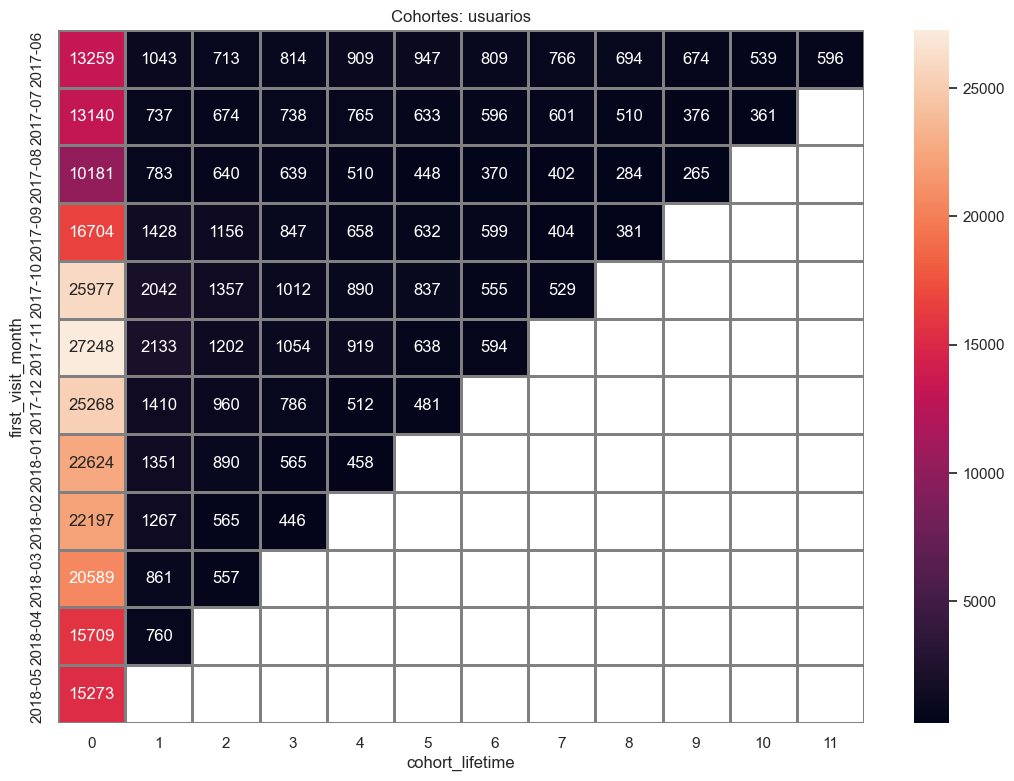

In [266]:
#Se determina el número de usuarios por cohorte en cada mes de vida y se muestra en un mapa de calor

visits['first_visit_month'] = visits['first_visit_month'].dt.strftime('%Y-%m')

users_pivot = visits.pivot_table(index='first_visit_month', columns='cohort_lifetime', values='uid', aggfunc='nunique')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohortes: usuarios')
sns.heatmap(users_pivot, annot=True, fmt='.0f', linewidths=1, linecolor='gray')
plt.show()

Se observa que siempre es el primer mes (mes 0) de cada cohorte el que cuenta con un mayor número de usuarios (algo lógico ya que los usuarios entran por primera vez para comprar los boletos que requieren en ese momento) y después por lo general no lo vuelven a usar.

#### ¿Cuántas sesiones hay por día? 

Se determina el promedio de sesiones por día.

In [267]:
# Se detetrminará las sesiones promedio por día

sessions_per_day = visits.groupby('session_date')['start_ts'].count().mean()
print('Sesiones por día =', int(sessions_per_day))

Sesiones por día = 987


Ahora se determinan las sesiones por día para cada cohorte por cada mes de vida.

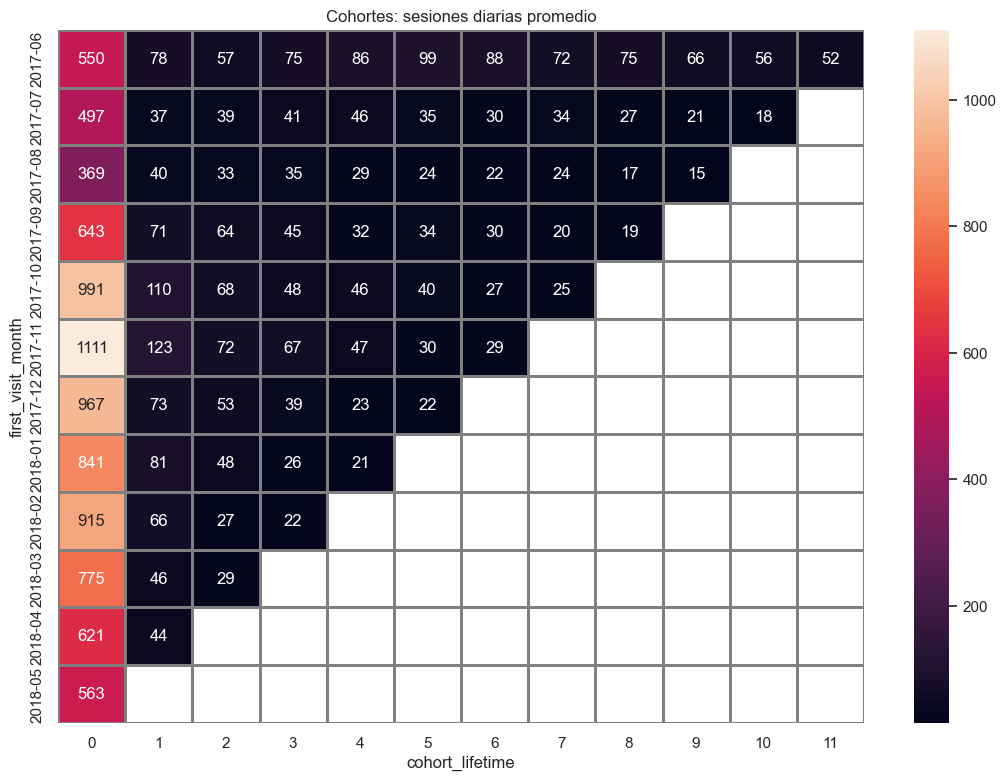

In [268]:
#Se determina el número de sesiones promedio al día por cohorte en cada mes de vida y se muestra en un mapa de calor

sessions = visits.groupby(['first_visit_month', 'cohort_lifetime', 'session_date'])['start_ts'].count().reset_index()

sessions_pivot = sessions.pivot_table(index='first_visit_month', columns='cohort_lifetime', values='start_ts', aggfunc='mean')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohortes: sesiones diarias promedio')
sns.heatmap(sessions_pivot, annot=True, fmt='.0f', linewidths=1, linecolor='gray')
plt.show()

Mismo caso que con los usuarios, el mes 0 de cadad cohorte es el que tiene más actividad, y podemos observar que las cantidades de las sesiones diarias del primer mes son congruentes con el número de nuevos usuarios en cadad cohorte.

#### ¿Cuál es la duración de cada sesión?

Se determina la duración promedio de cada sesión (Average Length Session)

In [269]:
# Se calcula el ASL

ASL = visits['session_duration_sec'].mean()
print('Duración promedio de cada sesión (ASL) =', int(ASL), 'segundos')

Duración promedio de cada sesión (ASL) = 643 segundos


Puede que haya sesiones de 0 segundos que estén afectando el resultado, así que crearemos un histograma de la durarción de la sesión para ver la distribución de la población

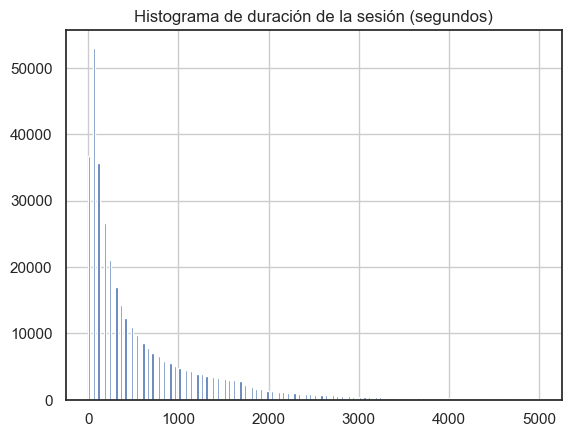

In [270]:
# Se crea el histograma de duración de la sesión

visits['session_duration_sec'].hist(bins=200, range=(0,5000))
plt.title('Histograma de duración de la sesión (segundos)')
plt.show()

Se observa que el histograma nos enseña que el número de visitas aumenta mientra el valor de la duración de la sesión se acerca más a cero.
Para esto tenemos que calcular la mediana y la moda de la distribución para poder tener una meor perspectiva del comportammiento de los usuarios.

In [271]:
# Se saca la moda y la mediana de los datos

session_length_mode = visits['session_duration_sec'].mode()
session_length_median = visits['session_duration_sec'].median()
print('Duración más común de sesión =', int(session_length_mode), 'segundos')
print()
print('Duración mediana de sesión =', int(session_length_median), 'segundos')

Duración más común de sesión = 60 segundos

Duración mediana de sesión = 300 segundos


C:\Users\Dell Braulio\AppData\Local\Temp\ipykernel_17860\2889277588.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('Duración más común de sesión =', int(session_length_mode), 'segundos')


Observamos que la mitad de la población no tarda más de 5 min en la sesión, siendo el tiempo más común el de  minuto.

#### ¿Con qué frecuencia los usuarios regresan?

Se calculará la tasa de retención y la tasa de cancelación mensual de cada cohorte para entender mejor el comportamiento de los usuarios.

In [272]:
# Primero se determinará la tasa de retención de cada cohorte mensual
# Se saca el número de ususarios por cohorte por cada mes

users_count = visits.groupby(['first_visit_month', 'cohort_lifetime'])['uid'].nunique().reset_index()
users_count = users_count.rename(columns={'uid': 'cohort_users'})

In [273]:
# Se crea una columna con el múmero de usuarios iniciales por cohorte

initial_users_count = users_count[users_count['cohort_lifetime'] == 0][['first_visit_month', 'cohort_users']]
initial_users_count = initial_users_count.rename(columns={'cohort_users': 'cohort_initial_users'})
users_count = users_count.merge(initial_users_count, on='first_visit_month')

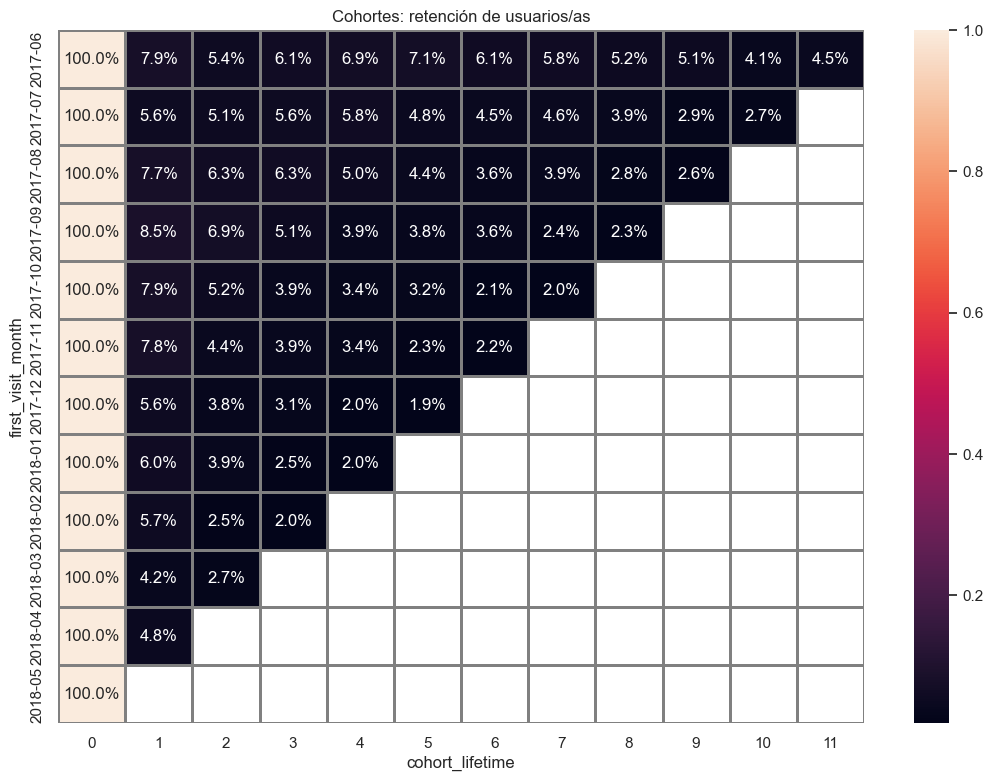

In [274]:
# Se saca la tasa de retención y se muestra en un mapa de calor

users_count['retention'] = users_count['cohort_users'] / users_count['cohort_initial_users']

retention_pivot = users_count.pivot_table(index='first_visit_month', columns='cohort_lifetime', values='retention', aggfunc='sum')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohortes: retención de usuarios/as')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')
plt.show()

Como se deduce desde el inicio, hay una muy baja tasa de retención porque la mayoría de los usuarios entran por primera vez al sitio para comprar los boletos por los cuales están interesados, ya saben a qué van y no hacen la visita para ver que hay de nuevo; los pocos que se quedan son justo esos usuarios que después buscan más eventos que les puedan llamar la atención.

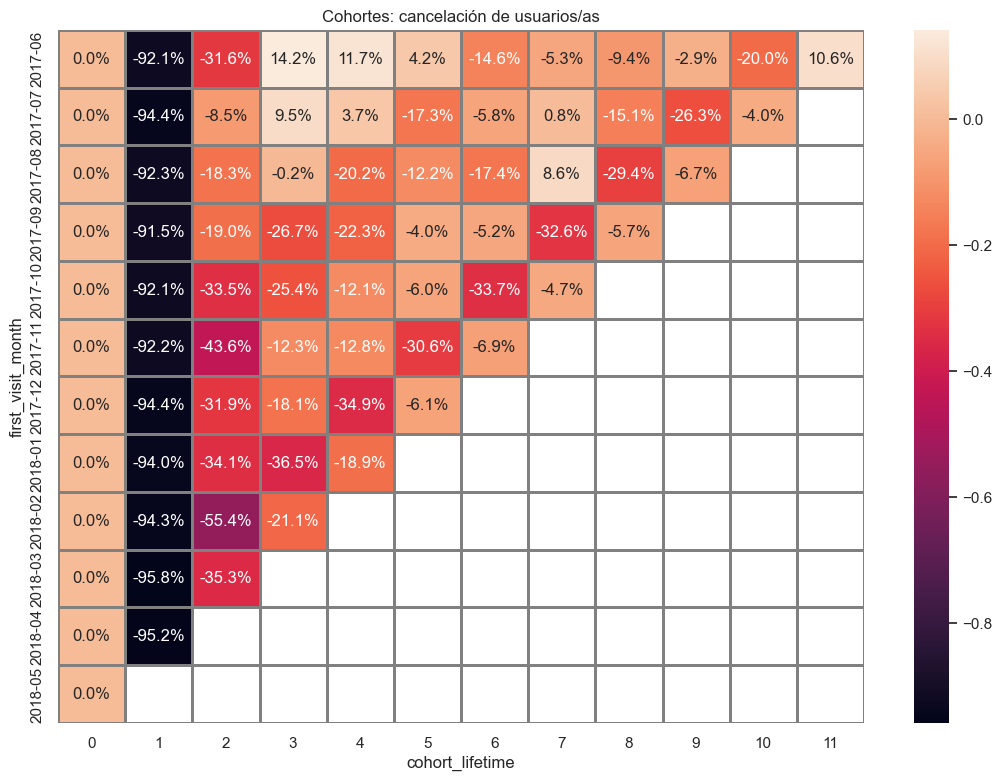

In [275]:
# Ahora se determinará la tasa de cancelación de cada cohorte mensual y se muestra en un mapa de calor

users_count['churn'] = users_count.groupby('first_visit_month')['cohort_users'].pct_change()

churn_pivot = users_count.pivot_table(index='first_visit_month', columns='cohort_lifetime', values='churn', aggfunc='sum')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohortes: cancelación de usuarios/as')
sns.heatmap(churn_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')
plt.show()

Se puede observar que, con algunas pocas excepciones, la tasa de cancelación siempre es negativa, en el primer mes de vida es muy drástica, siempre mayor al -90% (mayor en cuanto a cantidad absoluta) y después va bajando poco a poco, pero no se ve que alguna cohorte esté interesada en volver a comprar (muy poca actividad positiva se ve en la primer cohorte pero nada  importante).

### Ventas

#### ¿Cuándo empieza la gente a comprar? (tiempo entre registro y conversión)

Se compararán las conversiones de diferentes cohortes para determinar que cohorte o canal de marketing es más efectivo.

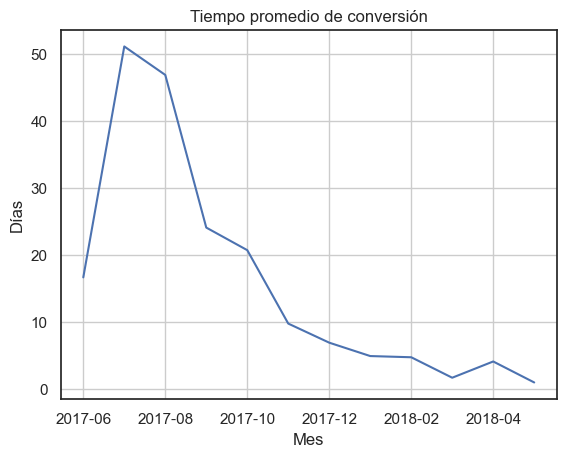

In [276]:
# Se calcula el tiempo promedio de conversión en días de la primer compra de los usuarios de cada cohorte

conversion = visits.merge(orders, on='uid')

conversion['conversion_time_day'] = ((conversion['first_order_date'] - conversion['first_visit_date']) / np.timedelta64(1, 'D'))
conversion_first_order = conversion.groupby('first_visit_month')['conversion_time_day'].mean()

conversion_first_order.plot(title= 'Tiempo promedio de conversión', xlabel='Mes', ylabel='Días')
plt.grid(True)
plt.show()

Se puede observar que las cohortes más recientes tienen menor tiempo de conversión, tardando en promedio menos de una semana en comprar boletos desde que se registran en el sitio.

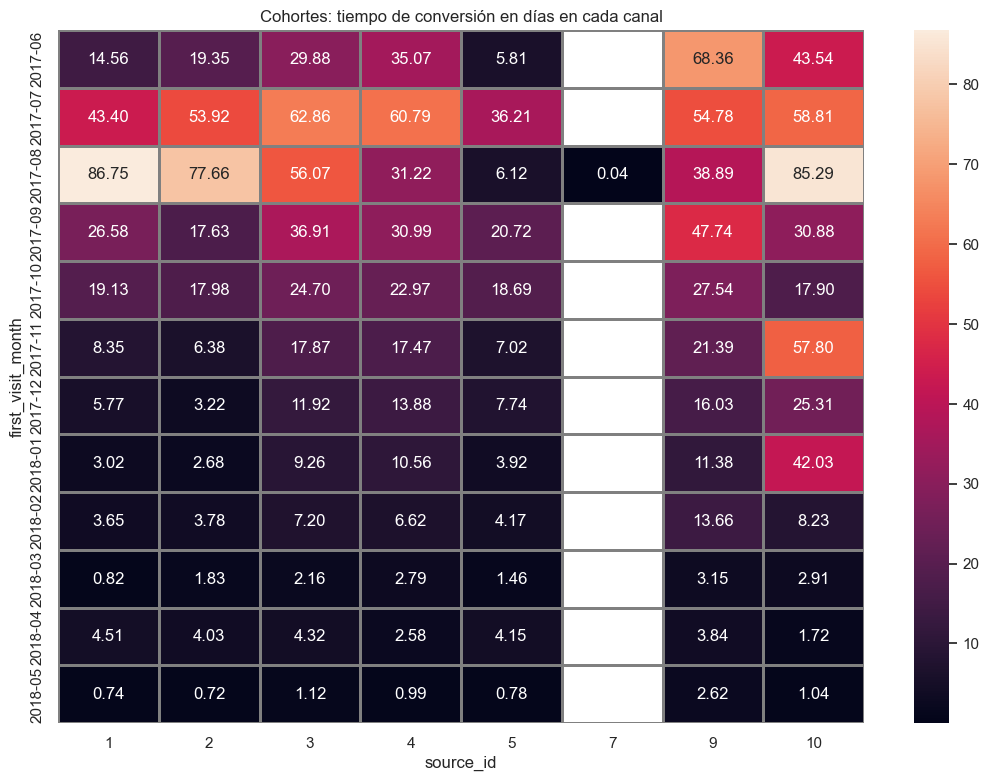

In [277]:
# Se calcula el tiempo de conversión general promedio por cohorte según cada canal de marketing

conversion_channel_pivot = conversion.pivot_table(index='first_visit_month', columns='source_id', values='conversion_time_day', aggfunc='mean')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohortes: tiempo de conversión en días en cada canal')
sns.heatmap(conversion_channel_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.show()

Observamos que los canales 6 y 8 no aportaron a ninguna conversión, y el canal 7 solo contribubyó a las conversiones (eficientes, a juzgar por el tiempo tan corto de conversión) de la cohorte de agosto de 2017.

Con el mapa de calor se puede determinar que canal de marketing es mejor para cada cohorte, pero también queremos saber qué canal es más efectivo en el tiempo de conversión.

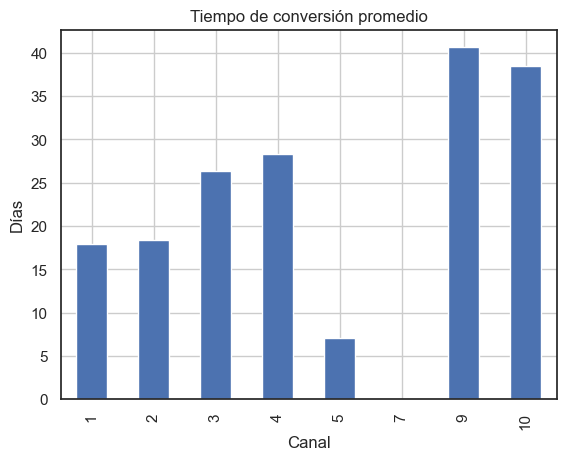

In [278]:
# Se calcula el tiempo de conversión promedio por canal

best_channel = conversion.groupby('source_id')['conversion_time_day'].mean()

best_channel.plot(kind='bar', title= 'Tiempo de conversión promedio', xlabel='Canal', ylabel='Días')
plt.grid(True)
plt.show()

Se puede ver que el canal 7 es el de mejor conversión, pero este solo fue implementado o solo fue usado por la cohorte de agosto de 2017, así que no sabemos cómo hubiera funcionado con las demás cohortes. En cuanto a los canales que se usaron por todas las cohortes, el mejor canal es el 5 con un promedio de una semana de conversión, seguido de los canales 1 y 2 con aproximadamente 18 días de conversión.

#### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [279]:
# Se creearán cohortes mensuales y se determinará el ciclo de vida de cada visita según la cohorte del usuario

orders['cohort_lifetime'] = (orders['order_month'] - orders['first_order_month']).apply(lambda x: x.n)

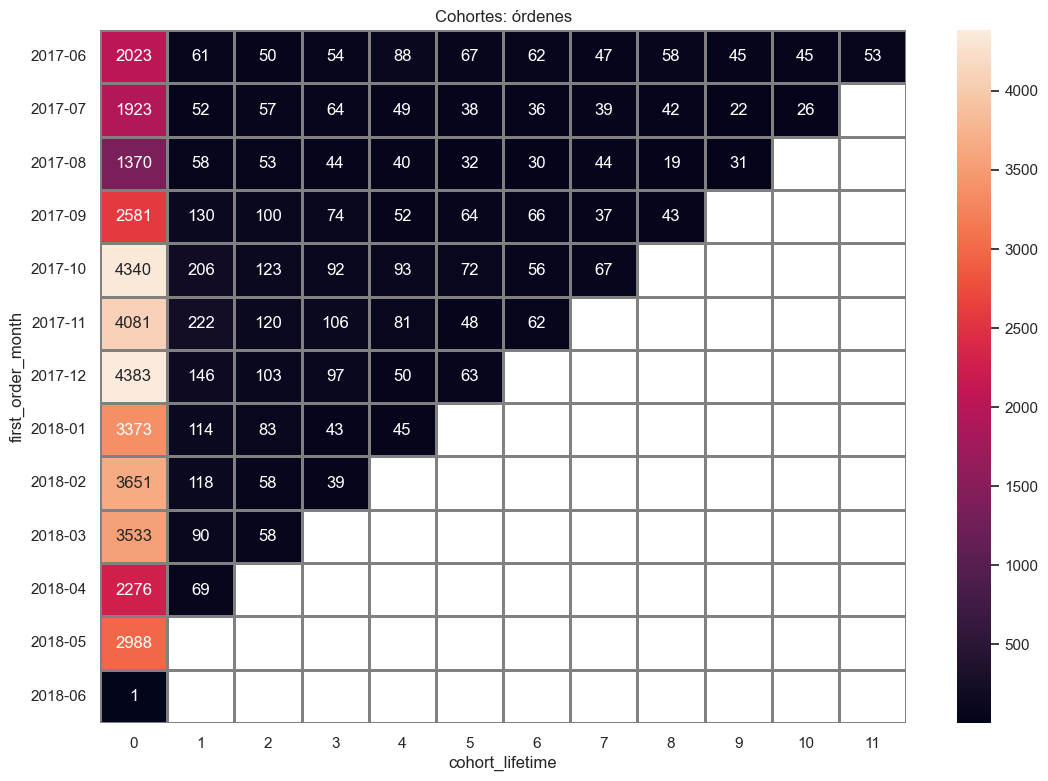

In [280]:
#Se determina el número de pedidos por cohorte en cada mes de vida y se muestra en un mapa de calor

orders['first_order_month'] = orders['first_order_month'].dt.strftime('%Y-%m')

orders_pivot = orders.pivot_table(index='first_order_month', columns='cohort_lifetime', values='uid', aggfunc='nunique')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohortes: órdenes')
sns.heatmap(orders_pivot, annot=True, fmt='.0f', linewidths=1, linecolor='gray')
plt.show()

Como se ha estado observando a lo largo del análisis, el pirmer mes de vida de cada cohorte es la más activa, y en las órdenes no es la excepción, en los demás meses de vida hay una disminución drástica de las órdenes, lo cual corrobora que los usuarios solo están interesados en comprar boletos al momento de registrarse por primera vez y no como compra recurrente.
Se puede observar un dato atípico en lo que sería la única compra realizada en la cohorte de junio de 2018, la cual no tiene relevancia en los resultados de este análisis.

#### ¿Cuál es el tamaño promedio de compra?

Se calcula el promedio general así como el promedio por cohorte en cada mes de vida.

In [281]:
#Se calcula el ticket promedio general

average_order_value = orders['revenue'].mean().round(2)
print('El ticket promedio global es de', average_order_value, 'dólares')

El ticket promedio global es de 5.0 dólares


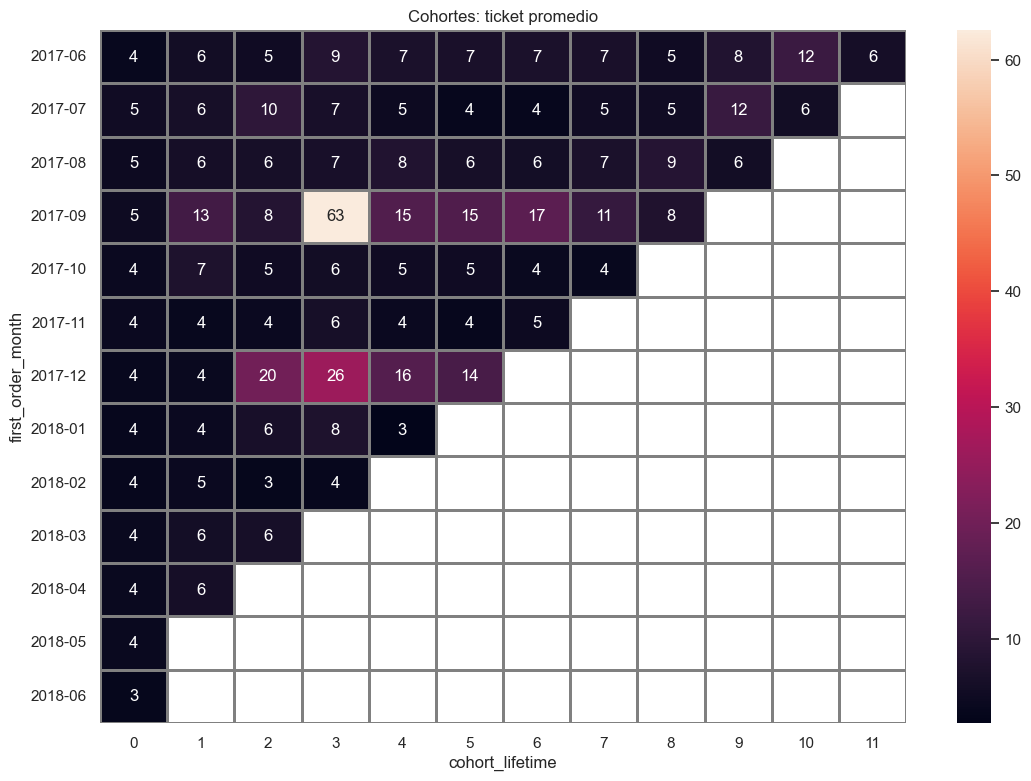

In [282]:
#Se determina el ticket promedio por cohorte en cada mes de vida y se muestra en un mapa de calor

revenue_pivot = orders.pivot_table(index='first_order_month', columns='cohort_lifetime', values='revenue', aggfunc='mean')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohortes: ticket promedio')
sns.heatmap(revenue_pivot, annot=True, fmt='.0f', linewidths=1, linecolor='gray')
plt.show()

Se observa que el ticket promedio no varía mucho entre cohortes y tampoco depende mucho de la madurez de la cohorte, aunque podemos ver que la cohorte de septiembre de 2017 en su cuarto mes de vida tuvo compras de boletos bastante caros.

#### ¿Cuánto dinero traen? (LTV)

Se procede a calcular el valor del ciclo de vida del cliente. Al no tener un margen de utilidad especificado, se procede a calcular el LTV con los ingresos completos.

In [283]:
# Se determina el LTV promedio por usuario por cohorte en cada mes de vida y se muestra en un mapa de calor
# Primero se calcula los usuarios iniciales de cada cohorte (visitas porque al final se hará el ROI de marketing,
# el cual es o no bueno según las visitas y no según las órdenes)

first_visit_month_ = visits.groupby('uid')['first_visit_month'].min().reset_index()
orders_ = orders.merge(first_visit_month_, on='uid')

cohort_users = visits.groupby('first_visit_month')['uid'].nunique().reset_index()
cohort_users = cohort_users.rename(columns={'uid': 'visit_first_users'})
orders_ = orders_.merge(cohort_users, on='first_visit_month')

In [284]:
# Ahora se agrupa los ingresos por mes de cohorte de visita y mes de la orden y se saca la edad de la cohorte
# (cuántos meses pasaron entre la compra y la primer visita)

cohorts_ltv = orders_.groupby(['first_visit_month', 'order_month']).agg({'revenue': 'sum', 'visit_first_users':'min'}).reset_index()
cohorts_ltv['first_visit_month'] = pd.to_datetime(cohorts_ltv['first_visit_month'])
cohorts_ltv['age'] = (cohorts_ltv['order_month'] - cohorts_ltv['first_visit_month'].dt.to_period('M')).apply(lambda x: x.n)

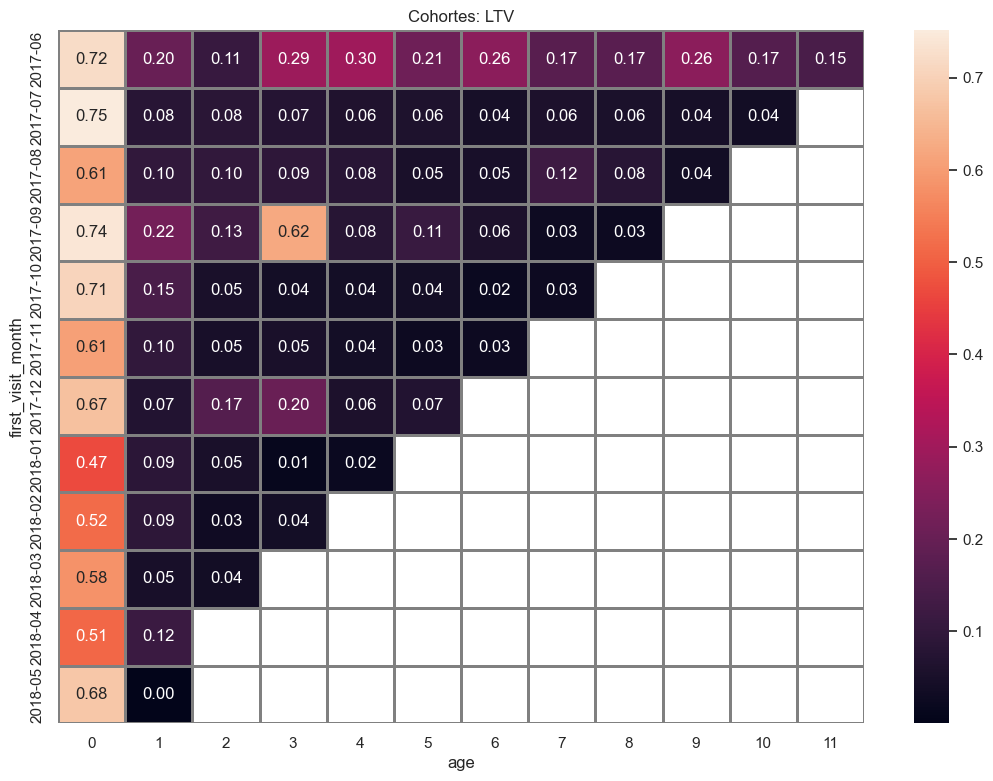

In [285]:
# Se calcula el LTV y se genera un mapa de calor del LTV para cada cohorte y su tiempo de vida

cohorts_ltv['ltv'] = cohorts_ltv['revenue'] / cohorts_ltv['visit_first_users']

cohorts_ltv['first_visit_month'] = cohorts_ltv['first_visit_month'].dt.strftime('%Y-%m')

ltv_pivot = cohorts_ltv.pivot_table(index='first_visit_month', columns='age', values='ltv', aggfunc='mean')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohortes: LTV')
sns.heatmap(ltv_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.show()

Se observa el mismo comportamiento de la mayor actividad en el primer mes de vida de las cohortes, que es donde aportan más dinero a la empresa y decae drásticamente a partir del segundo mes de vida.

### Marketing

#### ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 

Se calculará el total del gasto a lo largo de todos los meses disponibles en los dataframes.

In [286]:
total_costs = costs['costs'].sum()
print('Total de gastos =', total_costs)

Total de gastos = 329131.62


Se calcula el total de gasto por fuente de adquisición.

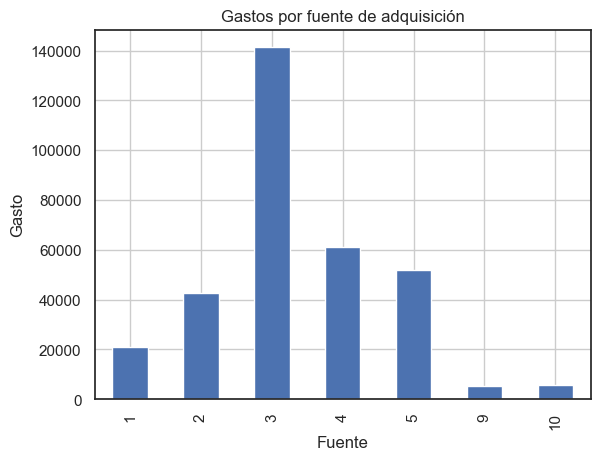

In [287]:
source_costs = costs.groupby('source_id')['costs'].sum()

source_costs.plot(kind='bar', title= 'Gastos por fuente de adquisición', xlabel='Fuente', ylabel='Gasto')
plt.grid(True)
plt.show()

Se puede ver claramente que la mayor inversión ded marketing está en la fuente número 3.

Ahora se calculan los gastos mensuales totales.

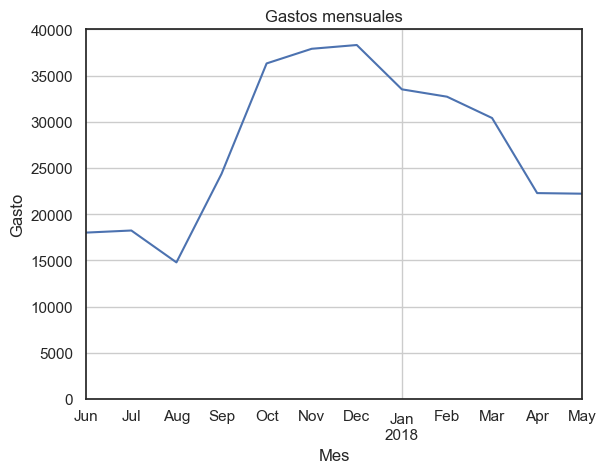

In [288]:
costs_month = costs.groupby('cost_month')['costs'].sum()

costs_month.plot(title= 'Gastos mensuales', xlabel='Mes', ylabel='Gasto')
plt.ylim(0, 40000)
plt.grid(True)
plt.show()

El gráfico demuestra que de Octubre de 2017 a Diciembre de 2017 es el mayor pico en el gasto de marketing, mientras que en Agosto de 2017 es el menor (coincidentemente en invierno y su opuesto el verano, alguna relación estacional puede tener el gasto).

Ahora se hará la relación de gastos por mes de cada fuente.

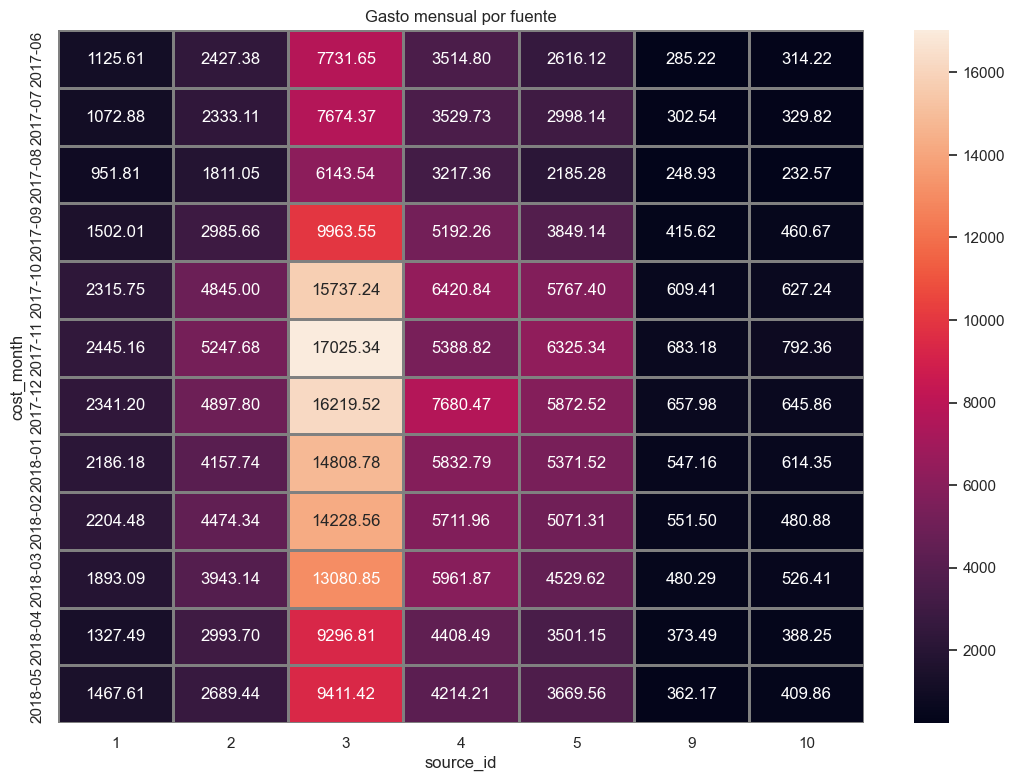

In [289]:
# Se crea un mapa de calor para los gastos mensuales de cada fuente

costs['cost_month'] = costs['cost_month'].dt.strftime('%Y-%m')

costs_pivot = costs.pivot_table(index='cost_month', columns='source_id', values='costs', aggfunc='sum')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Gasto mensual por fuente')
sns.heatmap(costs_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.show()

El mapa de calor corrobora lo que se mencionó en los gráficos anteriores, mayor gasto en el canal 3 en temporadda de invierno de 2017.

#### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

Se calculará el costo de adquisición promedio general, costo de adquisición promedio mensual, así como el de cada una de las fuentes (tanto general por mes).

Primero calculamos el CAC promedio mensual

In [290]:
# Se combinan los datos de las cohortes de visitas con los costos mensuales de esa cohorte

costs_month = costs_month.reset_index()
costs_month['cost_month'] = costs_month['cost_month'].dt.strftime('%Y-%m')

cac = cohorts_ltv.merge(costs_month, left_on='first_visit_month', right_on='cost_month')
cac = cac.rename(columns={'costs': 'monthly_sum_cost'})

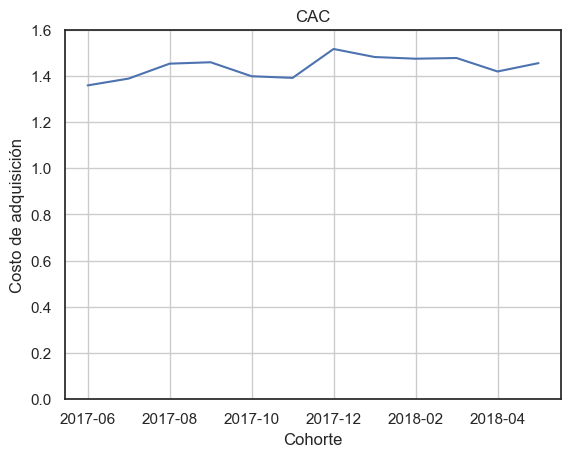

In [291]:
# Se calcula el CAC (el costo de adquisición por cada usuario atraído, es decir, por cada primer visita) y se grafica

cac['cac'] = cac['monthly_sum_cost'] / cac['visit_first_users']

monthly_cac = cac.groupby('first_visit_month')['cac'].mean()

monthly_cac.plot(title= 'CAC', xlabel='Cohorte', ylabel='Costo de adquisición')
plt.ylim(0, 1.6)
plt.grid(True)
plt.show()

Hay un mayor costo de adquisición para la cohorte de agosto de 2017 y uno menor para la primera cohorte de junio de 2017.

Ahora vamos con el promedio general

In [292]:
# Se calcula el CAC promedio general

cac_total = cac['cac'].mean().round(2)
print('Promedio de costos de adquisición =', cac_total)

Promedio de costos de adquisición = 1.43


Ahora procedemos a calcular el costo de adquisición de cada una de las fuentes y graficar el resultado.

In [293]:
# Se asigna la fuente a cada usuario con la que ingresaron por primera vez al sitio

users_source = visits.sort_values(['uid', 'start_ts']).groupby('uid').first().reset_index()
users_source = users_source[['uid', 'source_id']]
users_source = users_source.rename(columns={'source_id':'first_source_id'})

In [294]:
# Se agrega la información al dataframe 'visits' para después determinar el número de usuarios por canal de adquisición

visits_source = visits.merge(users_source, on='uid')
visits_source = visits_source.groupby('first_source_id')['uid'].nunique().reset_index()
visits_source = visits_source.rename(columns={'uid': 'unique_visitors'})

In [295]:
# Se determina el gasto por canal de adquisición

costs_source = costs.groupby('source_id')['costs'].sum().reset_index()
costs_source = costs_source.rename(columns={'source_id':'first_source_id', 'costs': 'total_costs_source'})

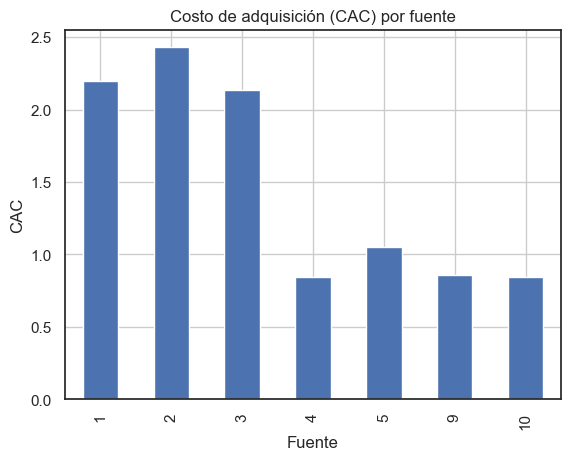

In [296]:
# Se calcula el CAC por canal y se grafica

cac_source = visits_source.merge(costs_source, on='first_source_id')

cac_source['cac_source'] = cac_source['total_costs_source'] / cac_source['unique_visitors']

cac_source.plot(x='first_source_id', y='cac_source', kind='bar', title= 'Costo de adquisición (CAC) por fuente', xlabel='Fuente', ylabel='CAC', legend=False)
plt.grid(True)
plt.show()

Se puede observar que las fuentes en las que mas costo tienen por adquisición es la 1, 2 y 3, a comparación de las fuentes 4, 5, 9 y 10 que son las de menor costo.

Ahora se saca los valores del CAC mensual para cada fuente de adquisición.

In [297]:
# Se agrega la información de 'ursers_source' al dataframe 'visits' para después determinar el número de usuarios por canal de adquisición de cada mes

visits_month_source = visits.merge(users_source, on='uid')
visits_month_source = visits_month_source.groupby(['first_visit_month', 'first_source_id'])['uid'].nunique().reset_index()

In [298]:
# Se determina el gasto mensual por canal de adquisición

costs_month_source = costs.groupby(['cost_month','source_id'])['costs'].sum().reset_index()
costs_month_source = costs_month_source.rename(columns={'cost_month':'first_visit_month', 'source_id': 'first_source_id'})

In [299]:
# Se combina la información anterior y se calcula el CAC mensual por fuente de marketing

cac_month_source = pd.merge(visits_month_source, costs_month_source, on=['first_visit_month', 'first_source_id'])
cac_month_source['cac_month_source'] = cac_month_source['costs'] / cac_month_source['uid']

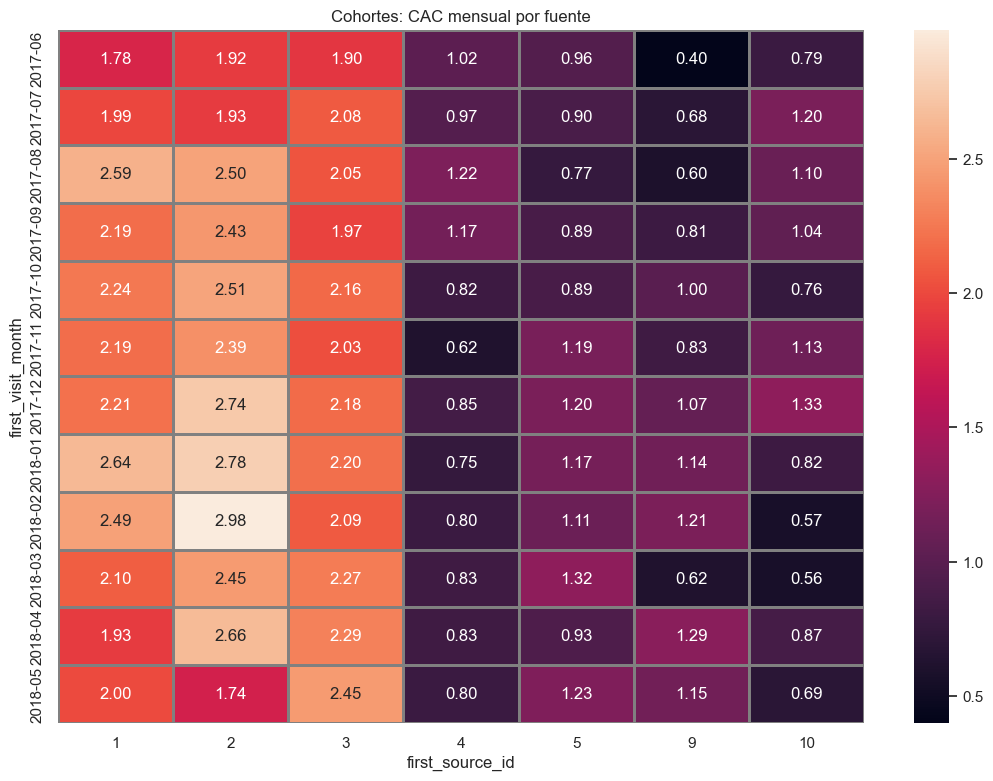

In [300]:
# Se crea un mapa de calor para los gastos mensuales de cada fuente

cac_month_source_pivot = cac_month_source.pivot_table(index='first_visit_month', columns='first_source_id', values='cac_month_source', aggfunc='mean')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohortes: CAC mensual por fuente')
sns.heatmap(cac_month_source_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.show()

#### ¿Cuán rentables eran las inversiones? (ROMI de la campaña publicitaria = beneficio bruto de la campaña / gastos.)

Para saber en cuánto tiempo se recuperan los costos, se calculará el retorno de la inversión en marketing (ROMI).

Para esto primero se calcula el ROMI por cohorte en cada mes de vida para posteriormente hacer un acumulado para cada cohorte y ver en que mes del ciclo de vida se hizo el retorno de la inversión al 100%

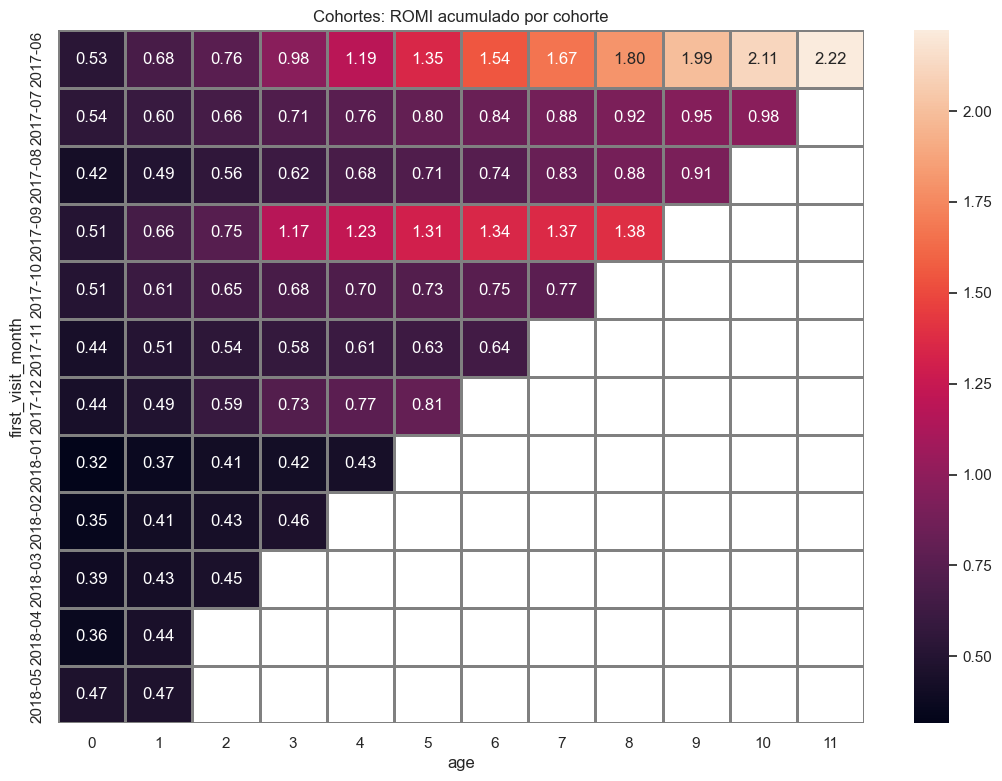

In [301]:
# Se calcula el ROMI y se saca el mapa de calor con los valores acumulados

cac['romi'] = cac['ltv'] / cac['cac']

romi_pivot = cac.pivot_table(index='first_visit_month', columns='age', values='romi', aggfunc='mean')
romi_pivot = romi_pivot.cumsum(axis=1)

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohortes: ROMI acumulado por cohorte')
sns.heatmap(romi_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.show()

Se puede notar que el tiempo de retorno depende mucho de la cohorte, pudiendo ser en tan solo 4 meses o hasta no haber llegado nunca después de casi 1 año entero. La primer cohorte en rertornar el 100 de la inversión es la de septiembre de 2017, aunque la mejor cohorte ha sido la de junio de 2017 retornando el doble de la inversión en casi 10 meses a comparación de la proyección que tiene la cohorte de septiembre de 2017, la cual se ha estancado y no se ve posible el mismo rendimiento.

Mientras tanto, la peor cohorte has sido la de julio de 2017 (cuyo puesto puede ser robado por la cohorte de enero de 2018 si siguen con la misma proyección).

Ahora se sacará el promedio del ROMI de todas las cohortes por cada mes del ciclo de vida para ver el retorno de inversión general.

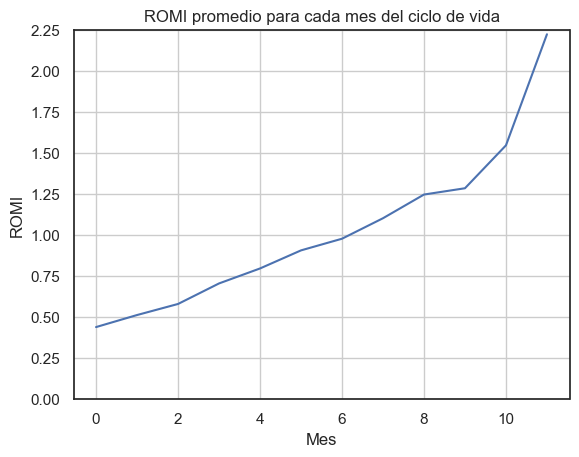

In [302]:
romi_lieftime = romi_pivot.mean(axis=0)

romi_lieftime.plot(title= 'ROMI promedio para cada mes del ciclo de vida', xlabel='Mes', ylabel='ROMI')
plt.ylim(0, 2.25)
plt.grid(True)
plt.show()

Se puede observar que el retorno de la inversión inicial se da por lo general a los 6 meses de vida de la cohorte, pero se ve que la ganancia se duplica en menos de 11 meses (el promedio de los meses de vida mayores tiene información de menos cohortes).

## Conclusión general

#### ¿Qué fuentes/plataformas recomendarías?

Quitar la inversión masiva del canal de marketing 3 y la inversión del 1 y el 2 parar dársela a los canales 4, 5, 9 y 10 (mucho más al 9 y al 10 que son los canales en los que menos se invierte) poque el que tienen un menor CAC; deberían o descartar por el momento los peores canales y enfocarse en los que sí sirven o hacer una mejora en los peores canales para que atraigan más usuarios.

En cuanto al tiempo de conversión de cada canal, los mejores son el 1, 2 y 5, por lo que, de acuerdo a lo antes mencionado, valdría la pena seguir invirtiendo en el canal número 5.

#### ¿Qué conclusiones sacaste después de encontrar los valores métricos?

Se nota que los usuarios usan la plataforma una única vez, podrían hacerse campañas de pulicidad y promociones para mejorar la tasa de retención.

Se ve que el sitio tiene una buena interfaz ya que los usuarios tardan muy poco tiempo en las sesiones.

El tiempo de conversión ha ido bajando en las últimas cohortes, lo cual es un punto positivo pero ahora el sitio se debe enfocar en amortiguar su tasa de cancelación porque al parecer la compra de la conversión del usuario es casi siempre la única que hace.

Por lo general el número de órdenes son linealmente proporcionales al número de visitas.

El ticket promedio es muy parecido en todas las cohortes a lo largo de todo su ciclo de vida, por lo que si se quiere generar más ingresos debería haber más promociones que hagan que el ingreso por compra aumente un poco.

El ROMI es un poco decente, por lo que hay que mejorar las ventas y reducir los costos innecesarios (como los canales de marketing que no funcionan), pero las cohortes más viejas demuestran que el retorno es mayor mientras más tiempo de vida tiene la cohorte.